# Data Profiling

Import package

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


import warnings
warnings.filterwarnings('ignore')

Load Dataset

In [2]:
df=pd.read_csv(r"C:\Users\HP\1.Myedusolve\3.Machine Learning\Versi Indo\50_Startups.csv")

In [3]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


Info Dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


Check Missing Value

In [5]:
df.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

# Data Cleansing

data is clean

# Exploratory Data Analysis

In [6]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


maximum profit 192k

average 110k

min profit 14k

<AxesSubplot:xlabel='State', ylabel='Administration'>

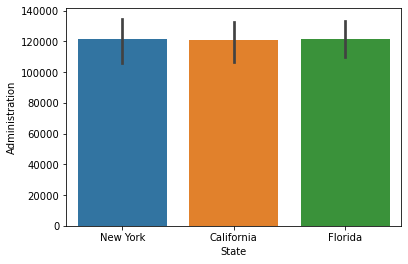

In [7]:
sns.barplot(x="State", y="Administration", data=df)

<AxesSubplot:xlabel='State', ylabel='R&D Spend'>

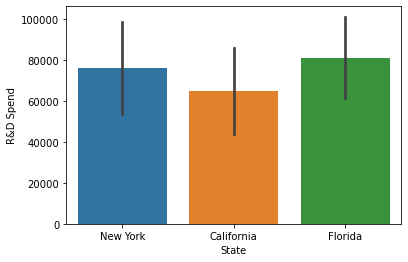

In [8]:
sns.barplot(x="State", y="R&D Spend", data=df)

<AxesSubplot:xlabel='State', ylabel='Marketing Spend'>

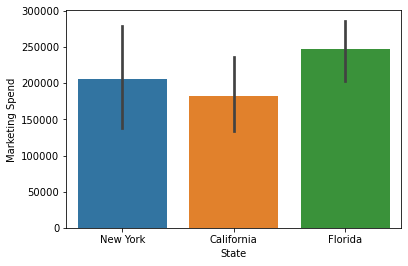

In [9]:
sns.barplot(x="State", y="Marketing Spend", data=df)

<AxesSubplot:xlabel='State', ylabel='Profit'>

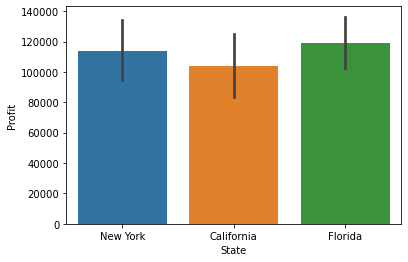

In [10]:
sns.barplot(x="State", y="Profit", data=df)

Text(0.5, 1.0, 'State')

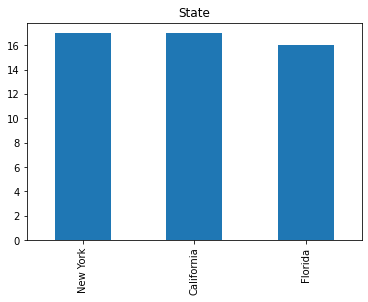

In [11]:
df['State'].value_counts().plot(kind='bar')
plt.title('State')

In [12]:
df['State'].value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

<AxesSubplot:>

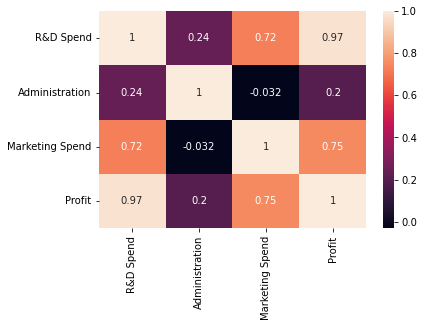

In [13]:
# Correlation

plt.figure(figsize = (6, 4))
sns.heatmap(df.corr(), annot=True)

# Feature Engineering
## One Code Encoding
transform Categorical

In [14]:
state_enc = pd.get_dummies(df['State'], prefix = 'State', drop_first = False)
df = df.drop(['State'], axis = 1)
df = pd.concat([df, state_enc], axis = 1)
df.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   R&D Spend         50 non-null     float64
 1   Administration    50 non-null     float64
 2   Marketing Spend   50 non-null     float64
 3   Profit            50 non-null     float64
 4   State_California  50 non-null     uint8  
 5   State_Florida     50 non-null     uint8  
 6   State_New York    50 non-null     uint8  
dtypes: float64(4), uint8(3)
memory usage: 1.8 KB


# MinMaxScaller

In [16]:
scaler = MinMaxScaler() # make administration aja drop R&D

In [17]:
df[['Administration']] = scaler.fit_transform(df[['Administration']])

# Preprocessing modelling

* Feature Selection

In [18]:
# drop multicollinear

In [19]:
df.drop("R&D Spend", axis = 1, inplace = True)

In [20]:
df.drop("Marketing Spend", axis = 1, inplace = True)

* Feature Importance

In [21]:
X = df.drop(["Profit"],axis=1)
y = df["Profit"]

In [22]:
# define model 
model = LinearRegression()

In [23]:
# fit the model
model.fit(X, y)

LinearRegression()

In [24]:
# get importance 
importance = model.coef_

In [25]:
# summarize feature importance
for i, v in enumerate(importance):
    print("Feature: %0d, Score: %.5f" % (i,v))
# if there is a minus, drop it
# df.drop("State_California", axis = 1, inplace = True)

Feature: 0, Score: 35901.33458
Feature: 1, Score: 16633500021522421760.00000
Feature: 2, Score: 16633500021522444288.00000
Feature: 3, Score: 16633500021522436096.00000


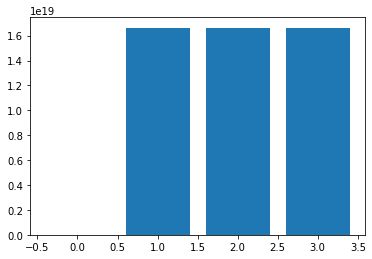

In [26]:
# plot feature importance 
plt.bar([x for x in range(len(importance))], importance)
plt.show()

* Split Training and Test Set

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8, random_state = 42)

# Machine Learning Regression - Multi Linear Regression

* Fitting into Training 

In [28]:
regressor = LinearRegression()

In [29]:
regressor.fit(X_train, y_train)

LinearRegression()

* Predict The Result

In [30]:
y_pred = regressor.predict(X_test) # anggep aja x disini ujian

* Plot the Result

In [31]:
result = pd.DataFrame({'Actual':y_test, 'Predict':y_pred})
result

,Actual,Predict
13,134307.35,105549.396899
39,81005.76,98610.154535
30,99937.59,120394.504355
45,64926.08,122157.809786
17,125370.37,124922.849104
48,35673.41,112589.322599
26,105733.54,124159.890159
25,107404.34,106085.646604
32,97427.84,104720.136440
19,122776.86,126037.680644


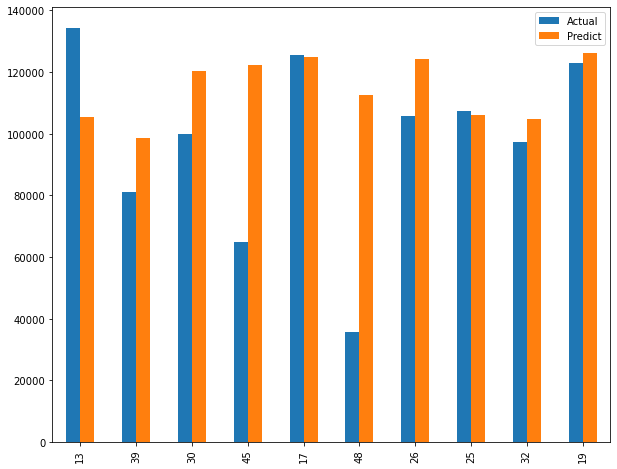

In [32]:
result.plot(kind = "bar", figsize = (10, 8))
plt.show()

^ between predictions and actual comparisons like that

# Evaluate Model

In [33]:
mape = mean_absolute_percentage_error(y_test, y_pred)

In [34]:
regressor = LinearRegression()

In [35]:
scores = cross_val_score(regressor, X_train, y_train, scoring='r2', cv=3)
scores

array([-0.09754521, -0.31055981, -0.42234266])

In [36]:
regressor.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [37]:
parameter = {"copy_X": [True, False],
            "fit_intercept": [True, False],
             "n_jobs": [None, -1],
             "normalize": [True, False],
             "positive": [True, False],
            }

In [38]:
grid = GridSearchCV(estimator = regressor, param_grid = parameter, cv = 3)

In [39]:
best_model = grid.fit(X_train, y_train)

In [40]:
best_model.best_params_

{'copy_X': True,
 'fit_intercept': False,
 'n_jobs': None,
 'normalize': True,
 'positive': True}

In [41]:
regressor_new = LinearRegression(positive=True, normalize=True, n_jobs = None, fit_intercept=False, copy_X=True)

In [42]:
# train w param best param

In [43]:
y_pred_new = regressor_new.fit(X_train, y_train)

In [44]:
# predict best p

In [45]:
y_pred_new = regressor_new.predict(X_test)

In [46]:
# evaluale

In [47]:
mape_new = mean_absolute_percentage_error(y_test, y_pred_new)

In [48]:
mape_new

0.3965270093583583

In [49]:
print(mape)
print(mape_new)
print(mape > mape_new)

0.3965270093583587
0.3965270093583583
True
